In [89]:
#import csv
import pandas as pd


In [90]:
#%pip install pandas

In [115]:
df_train = pd.read_csv('./data/train_set.csv')
df_test = pd.read_csv('./data/test_set.csv')

In [116]:
df_train.columns

Index(['phone_number', 'name', 'full_address', 'latitude', 'longitude',
       'review_count', 'rating', 'website', 'types', 'city', 'verified',
       'country', 'country_corrected', 'open_info', 'cluster_type',
       'distance_to_centroid'],
      dtype='object')

In [117]:
df_train.head()

,phone_number,name,full_address,latitude,longitude,review_count,rating,website,types,city,verified,country,country_corrected,open_info,cluster_type,distance_to_centroid
0,0,Hotel am Kornmarkt GmbH,1,50.116323,8.694880,32.0,4.4,0,Hotel,Frankfurt,False,Germany,Germany,0,132,0.301253
1,1,Amusement park TERRALTITUDE,1,49.989875,4.699309,606.0,4.6,1,"Amusement park, Tourist attraction",Fumay,True,France,France,0,22,0.368996
2,1,Trust E Store Dubai,1,25.274980,55.319172,2.0,5.0,1,Electronics store,Dubai,True,United Arab Emirates,United Arab Emirates,1,17,0.293268
3,1,The Bristol Inn Hotel,1,25.273519,55.322777,87.0,3.9,1,Hotel,Dubai,True,United Arab Emirates,United Arab Emirates,0,132,0.293264
4,1,Magic Planet City Centre Al Zahia,1,25.315866,55.454474,198.0,4.2,1,"Amusement park, Amusement center, Children's a...",Sharjah,True,United Arab Emirates,United Arab Emirates,1,22,0.294698


In [118]:


#drop following columns but save them in another dataframe: name, full_adress,types, city, country,country_corrected
df_train_dropped = df_train[['name',  'types', 'city', 'country', 'country_corrected']].copy()
df_train = df_train.drop(['name',  'types', 'city', 'country', 'country_corrected'], axis=1)




In [94]:
#do dummy encoding  0/1 but int not True/False on the following columns: cluster_type
#df_train = pd.get_dummies(df_train, columns=['cluster_type'], drop_first=True)
#df_train = df_train.drop(['dbscan_cluster'], axis=1)
#force all True/False columns to 0/1
#df_train = df_train * 1

#drop dbscan_cluster column



In [119]:
df_train.head()

,phone_number,full_address,latitude,longitude,review_count,rating,website,verified,open_info,cluster_type,distance_to_centroid
0,0,1,50.116323,8.694880,32.0,4.4,0,False,0,132,0.301253
1,1,1,49.989875,4.699309,606.0,4.6,1,True,0,22,0.368996
2,1,1,25.274980,55.319172,2.0,5.0,1,True,1,17,0.293268
3,1,1,25.273519,55.322777,87.0,3.9,1,True,0,132,0.293264
4,1,1,25.315866,55.454474,198.0,4.2,1,True,1,22,0.294698


In [120]:
#via sklearn prepare standarizer
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_train)
df_train_scaled = scaler.transform(df_train)
df_train_scaled = pd.DataFrame(df_train_scaled, columns=df_train.columns)

In [121]:
df_train_scaled

,phone_number,full_address,latitude,longitude,review_count,rating,website,verified,open_info,cluster_type,distance_to_centroid
0,-2.166018,0.154658,1.393429,-0.313001,-0.427900,0.170778,-1.197252,-1.493667,-1.588882,-0.495831,-0.407476
1,0.461677,0.154658,1.383070,-0.391986,1.625489,0.464637,0.835246,0.669493,-1.588882,-1.234969,-0.193557
2,0.461677,0.154658,-0.641643,0.608670,-0.535220,1.052354,0.835246,0.669493,0.629373,-1.268566,-0.432689
3,0.461677,0.154658,-0.641762,0.608741,-0.231146,-0.563868,0.835246,0.669493,-1.588882,-0.495831,-0.432703
4,0.461677,0.154658,-0.638293,0.611345,0.165938,-0.123080,0.835246,0.669493,0.629373,-1.234969,-0.428175
...,...,...,...,...,...,...,...,...,...,...,...
9113,0.461677,0.154658,-0.653942,0.606646,-0.302693,0.611566,0.835246,0.669493,0.629373,-0.173298,-0.442318
9114,-2.166018,0.154658,-0.640585,0.609728,-0.520910,-0.123080,-1.197252,-1.493667,-1.588882,-1.181214,-0.431080
9115,-2.166018,-6.465873,1.198636,-0.237607,-0.427900,0.170778,0.835246,0.669493,0.629373,-0.791486,-0.547726
9116,0.461677,0.154658,-0.642212,0.608567,-0.463673,0.317708,-1.197252,0.669493,0.629373,0.848055,-0.433143


In [122]:
df_dummies = pd.get_dummies(df_train_scaled['cluster_type'], drop_first=True)
X = df_dummies.values

In [123]:
X.shape

(9118, 317)

In [124]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [101]:
def explained_variance(n_components, X):
    pca = PCA(n_components=n_components)
    pca.fit(X)
    return pca.explained_variance_ratio_.sum()

# Range of n_components to test
components_range = list(range(2, X.shape[1]-11, 10))
explained_variances = []

# Calculate explained variance for each number of components
for n in components_range:
    explained_variances.append(explained_variance(n, X))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(components_range, explained_variances, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs Number of Components')
plt.grid(True)
plt.show()

KeyboardInterrupt: 

In [102]:
import numpy as np

In [125]:
#do dummy on cluster_type, PCA n=100
pca = PCA(n_components=100)
pca.fit(X)

#drop type_cluster from df_train_scaled and add PCA components. But I want it in dataframe
df_pca = pd.DataFrame(pca.transform(X))
df_train_scaled = df_train_scaled.drop(['cluster_type'], axis=1)
df_train_scaled = pd.concat([df_train_scaled, df_pca], axis=1)

df_train_scaled.head()


,phone_number,full_address,latitude,longitude,review_count,rating,website,verified,open_info,distance_to_centroid,...,90,91,92,93,94,95,96,97,98,99
0,-2.166018,0.154658,1.393429,-0.313001,-0.427900,0.170778,-1.197252,-1.493667,-1.588882,-0.407476,...,-0.000907,0.000660,-0.000045,0.000071,0.000011,0.000067,-0.000300,-0.000200,-0.000604,-0.000144
1,0.461677,0.154658,1.383070,-0.391986,1.625489,0.464637,0.835246,0.669493,-1.588882,-0.193557,...,-0.005553,0.003995,-0.000270,0.000428,0.000059,0.000374,-0.001772,-0.001180,-0.003494,-0.000827
2,0.461677,0.154658,-0.641643,0.608670,-0.535220,1.052354,0.835246,0.669493,0.629373,-0.432689,...,-0.002818,0.002041,-0.000139,0.000218,0.000033,0.000202,-0.000919,-0.000612,-0.001833,-0.000437
3,0.461677,0.154658,-0.641762,0.608741,-0.231146,-0.563868,0.835246,0.669493,-1.588882,-0.432703,...,-0.000907,0.000660,-0.000045,0.000071,0.000011,0.000067,-0.000300,-0.000200,-0.000604,-0.000144
4,0.461677,0.154658,-0.638293,0.611345,0.165938,-0.123080,0.835246,0.669493,0.629373,-0.428175,...,-0.005553,0.003995,-0.000270,0.000428,0.000059,0.000374,-0.001772,-0.001180,-0.003494,-0.000827


In [126]:
df_train_scaled.head()

,phone_number,full_address,latitude,longitude,review_count,rating,website,verified,open_info,distance_to_centroid,...,90,91,92,93,94,95,96,97,98,99
0,-2.166018,0.154658,1.393429,-0.313001,-0.427900,0.170778,-1.197252,-1.493667,-1.588882,-0.407476,...,-0.000907,0.000660,-0.000045,0.000071,0.000011,0.000067,-0.000300,-0.000200,-0.000604,-0.000144
1,0.461677,0.154658,1.383070,-0.391986,1.625489,0.464637,0.835246,0.669493,-1.588882,-0.193557,...,-0.005553,0.003995,-0.000270,0.000428,0.000059,0.000374,-0.001772,-0.001180,-0.003494,-0.000827
2,0.461677,0.154658,-0.641643,0.608670,-0.535220,1.052354,0.835246,0.669493,0.629373,-0.432689,...,-0.002818,0.002041,-0.000139,0.000218,0.000033,0.000202,-0.000919,-0.000612,-0.001833,-0.000437
3,0.461677,0.154658,-0.641762,0.608741,-0.231146,-0.563868,0.835246,0.669493,-1.588882,-0.432703,...,-0.000907,0.000660,-0.000045,0.000071,0.000011,0.000067,-0.000300,-0.000200,-0.000604,-0.000144
4,0.461677,0.154658,-0.638293,0.611345,0.165938,-0.123080,0.835246,0.669493,0.629373,-0.428175,...,-0.005553,0.003995,-0.000270,0.000428,0.000059,0.000374,-0.001772,-0.001180,-0.003494,-0.000827


In [127]:
#summarize column types df_train_scaled
df_train_scaled.dtypes

phone_number    float64
full_address    float64
latitude        float64
longitude       float64
review_count    float64
                 ...   
95              float64
96              float64
97              float64
98              float64
99              float64
Length: 110, dtype: object

In [128]:
df_train_scaled.columns = df_train_scaled.columns.astype(str) 

In [152]:
#prepare DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=50)
dbscan.fit(df_train_scaled)
df_train['dbscam_cluster'] = dbscan.labels_



In [153]:
#summarize the results
df_train['dbscam_cluster'].value_counts()

dbscam_cluster
 1     2004
-1     1824
 6     1075
 8      940
 2      573
 10     561
 3      457
 9      331
 13     164
 4      150
 17     143
 5      140
 16     129
 14     112
 7      107
 12     103
 0       98
 15      80
 11      77
 18      50
Name: count, dtype: int64

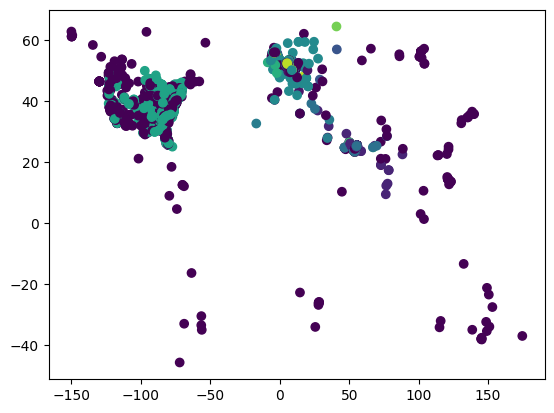

In [154]:


#visualize the results on plot
import matplotlib.pyplot as plt
plt.scatter(df_train['longitude'],df_train['latitude'], c=df_train['dbscam_cluster'])
plt.show()





In [ ]:
#do pca on df_train_scaled


In [ ]:
#show the explained variance



array([0.00820316, 0.00648614])